In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
print ("**********************************************************\n")
print ("Name of Program: Implementation of K-Means Clustering \n")
print("Performed By: Prakhar Singh \n")
print ("Roll No.: BE21F06F062 \n")
print ("**********************************************************\n")

**********************************************************

Name of Program: Implementation of K-Means Clustering 

Performed By: Prakhar Singh 

Roll No.: BE21F06F062 

**********************************************************



In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [25]:
print(iris['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [26]:
##independent features
X = pd.DataFrame(iris['data'], columns = ['sepal length in cm','sepal width','petal length','petal width'])

In [27]:
X

,sepal length in cm,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
##Dependent features
y = iris['target']

In [29]:
##Train Test Plot
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [30]:
##Apply Decision Tree classification
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf = 5)

In [31]:
treeclassifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

[Text(0.375, 0.875, 'x[2] <= 2.45\nentropy = 1.584\nsamples = 105\nvalue = [36, 33, 36]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 0.999\nsamples = 69\nvalue = [0, 33, 36]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.503\nsamples = 36\nvalue = [0, 32, 4]'),
 Text(0.125, 0.125, 'entropy = 0.206\nsamples = 31\nvalue = [0, 30, 1]'),
 Text(0.375, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.75, 0.375, 'x[0] <= 5.95\nentropy = 0.196\nsamples = 33\nvalue = [0, 1, 32]'),
 Text(0.625, 0.125, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

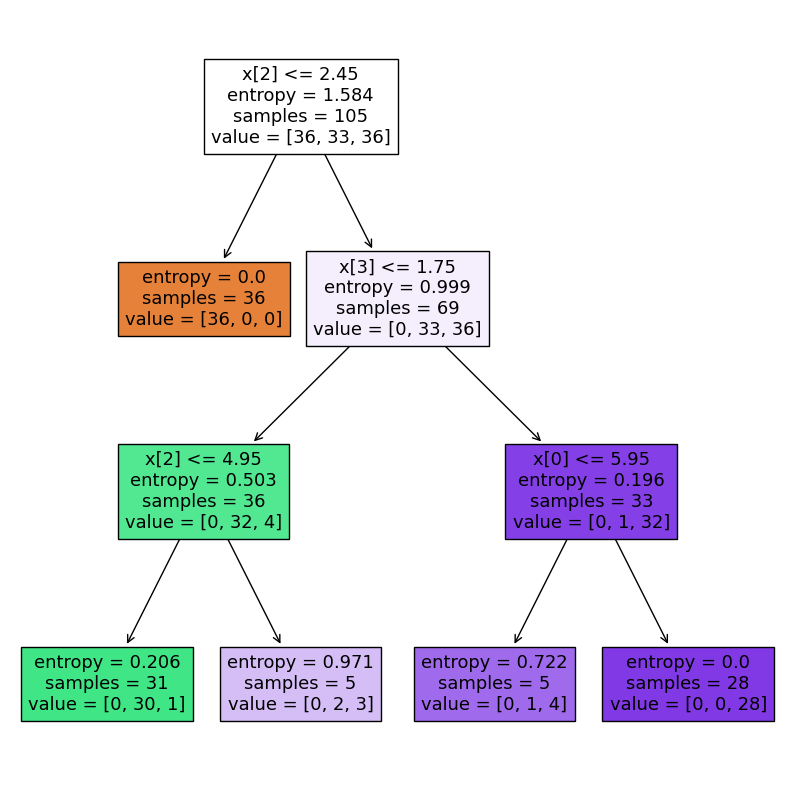

In [32]:
# Visualize the Decision Tree
from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(treeclassifier,filled = True)

In [38]:
y_pred = treeclassifier.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [40]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

1.0